In [92]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
auto_df=pd.read_csv('/content/auto-mpg.csv')

In [94]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [95]:
auto_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [96]:
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [97]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [98]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [99]:
auto_df[auto_df['horsepower'].str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [100]:
auto_df['horsepower']=auto_df['horsepower'].replace('?',np.nan)

In [101]:
auto_df['horsepower'].fillna(auto_df['horsepower'].median(),inplace=True)

In [102]:
auto_df['horsepower']=auto_df['horsepower'].astype('int')

In [103]:
auto_df.median()

<ipython-input-103-d9471e40bf4f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto_df.median()


mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.0
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [104]:
# origin of car (1. American, 2. European,3. Japanese).

In [105]:
mapper={1:'Origin_America',2:'Origin_Europe',3:'Origin_Japan'}
auto_df['origin']=auto_df['origin'].map(mapper)

In [106]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,Origin_America,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,Origin_America,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,Origin_America,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,Origin_America,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,Origin_America,ford torino


In [107]:
auto_df['origin'].value_counts()

Origin_America    249
Origin_Japan       79
Origin_Europe      70
Name: origin, dtype: int64

In [108]:
origin_df=pd.get_dummies(auto_df['origin'])

In [109]:
auto_df.drop(['origin','car name'],inplace=True,axis=1)

In [110]:
auto_df=pd.concat([auto_df,origin_df],axis=1)

In [111]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Origin_America,Origin_Europe,Origin_Japan
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [142]:
auto_attr=auto_df.iloc[:,0:7]
auto_attr.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773522,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841367,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895849,0.932824,-0.543684,-0.370164
horsepower,-0.773522,0.841367,0.895849,1.000000,0.862502,-0.686676,-0.413816
weight,-0.831741,0.896017,0.932824,0.862502,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686676,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413816,-0.306564,0.288137,1.000000


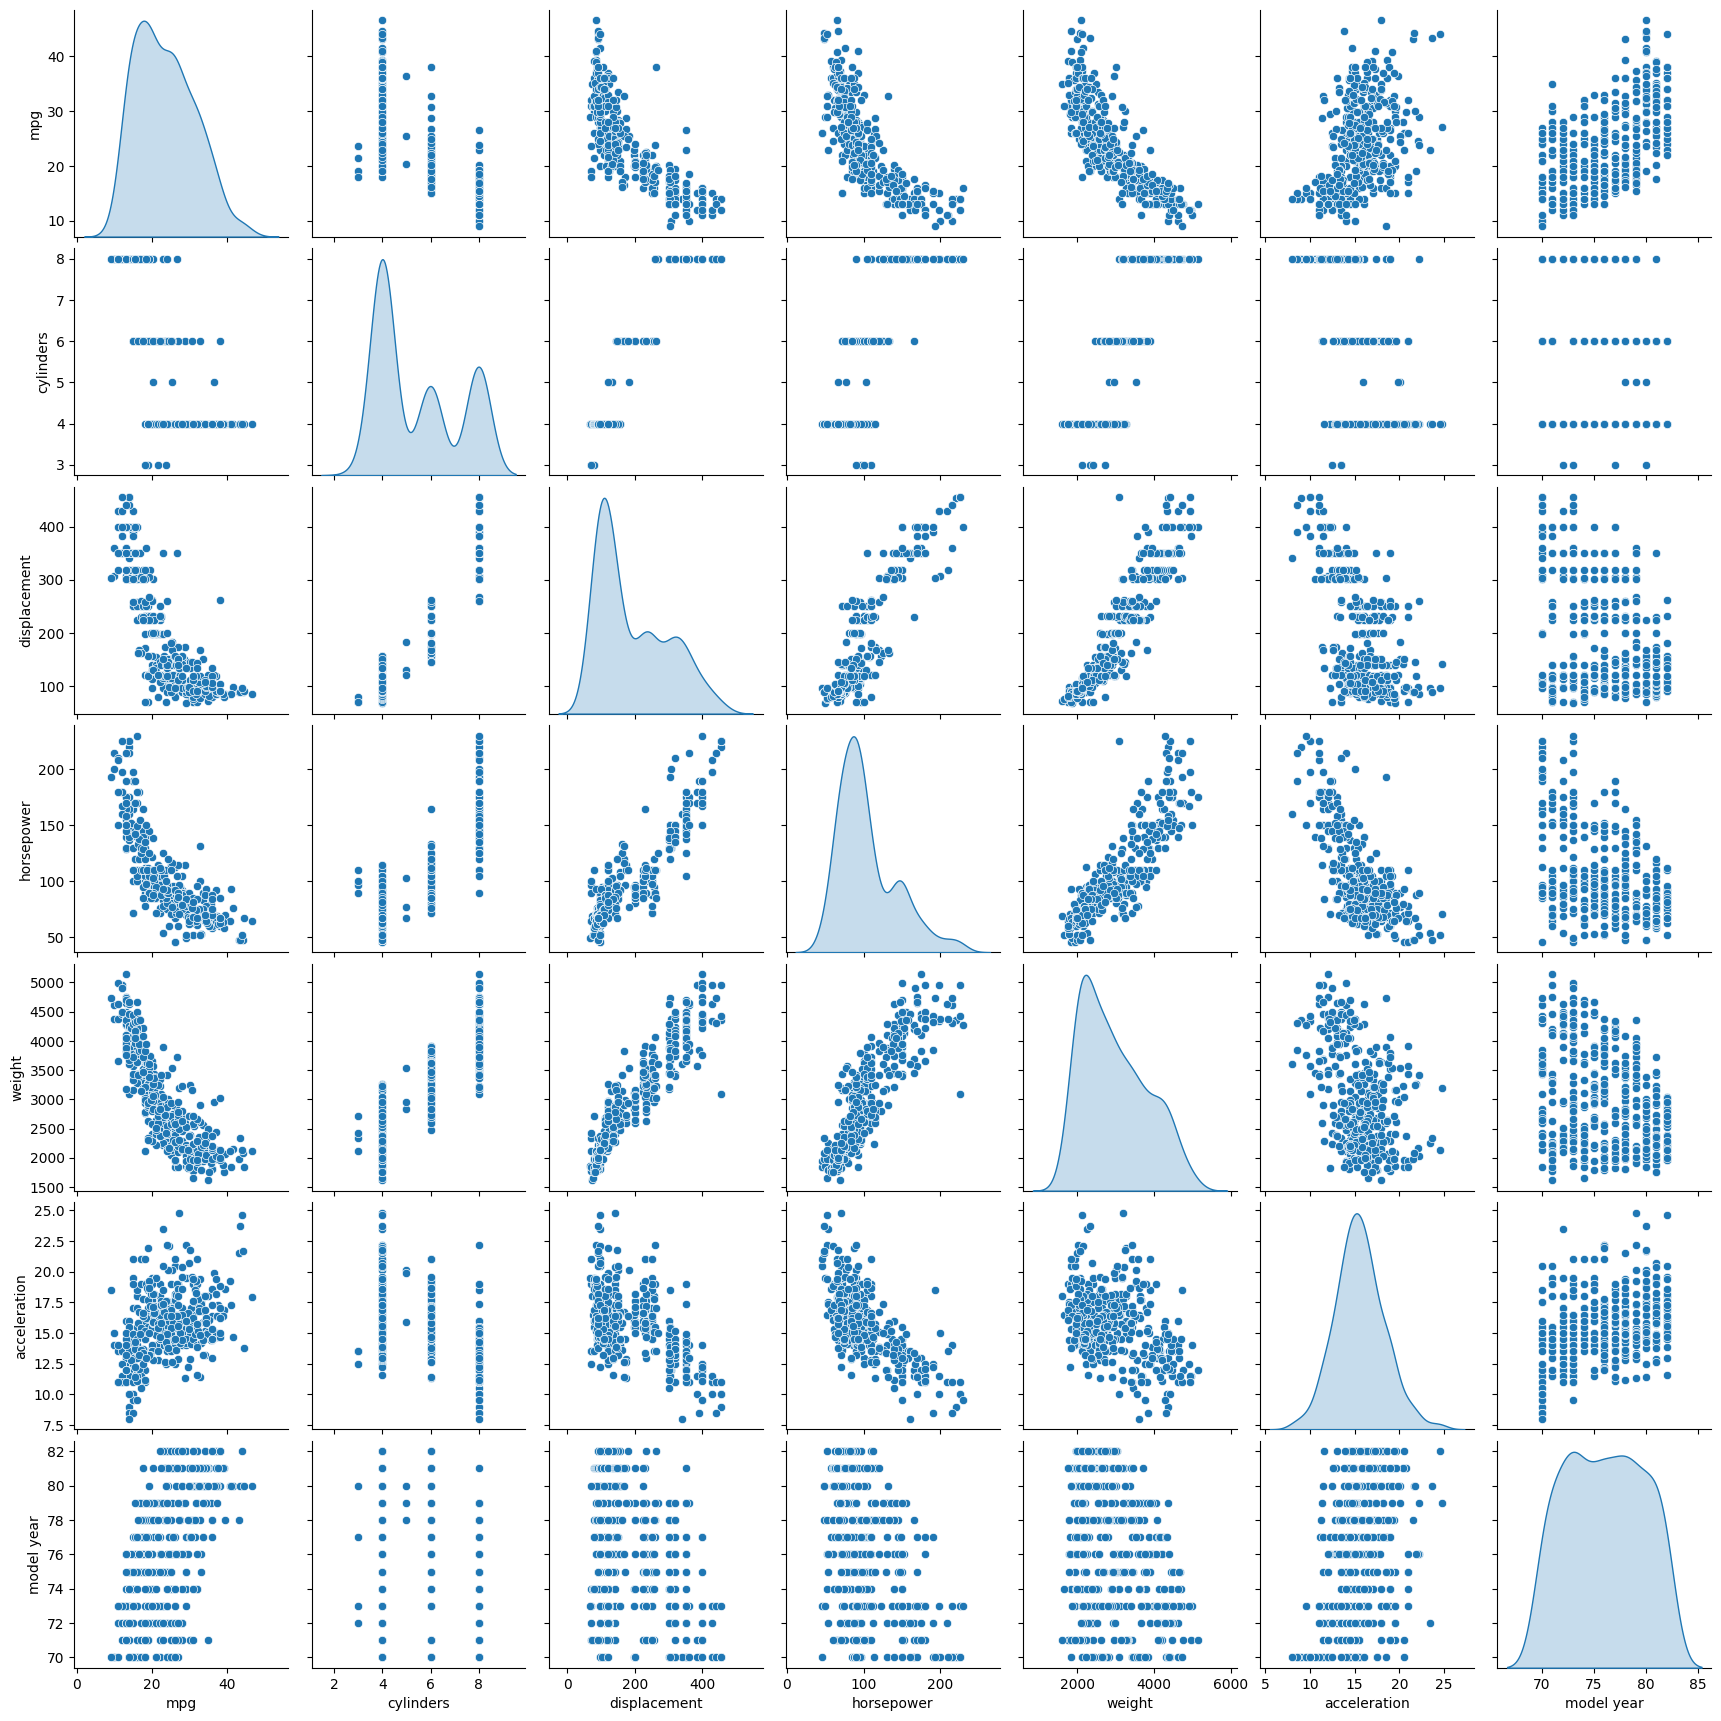

In [112]:
auto_attr=auto_df.iloc[:,0:7]
sns.pairplot(auto_attr,diag_kind='kde')

In [113]:
y=auto_df['mpg']
x=auto_df.drop('mpg',axis=1)

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [115]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [116]:
for i,col in enumerate(x_train):
    print(f"The coefficient(Slope) of {col} attribute is {model.coef_[i]}")


The coefficient(Slope) of cylinders attribute is -0.39474990695217776
The coefficient(Slope) of displacement attribute is 0.02894836656227911
The coefficient(Slope) of horsepower attribute is -0.021774145887455517
The coefficient(Slope) of weight attribute is -0.0073514821926643666
The coefficient(Slope) of acceleration attribute is 0.06180359937312989
The coefficient(Slope) of model year attribute is 0.8369119606164936
The coefficient(Slope) of Origin_America attribute is -1.7992314801858786
The coefficient(Slope) of Origin_Europe attribute is 1.202484194604566
The coefficient(Slope) of Origin_Japan attribute is 0.5967472855813117


In [117]:
model.intercept_

-19.482651401547106

In [118]:
y_hat=model.predict(x_test)

In [119]:
mse=mean_squared_error(y_test,y_hat)
rmse=np.sqrt(mse)
rmse

3.0266289575872345

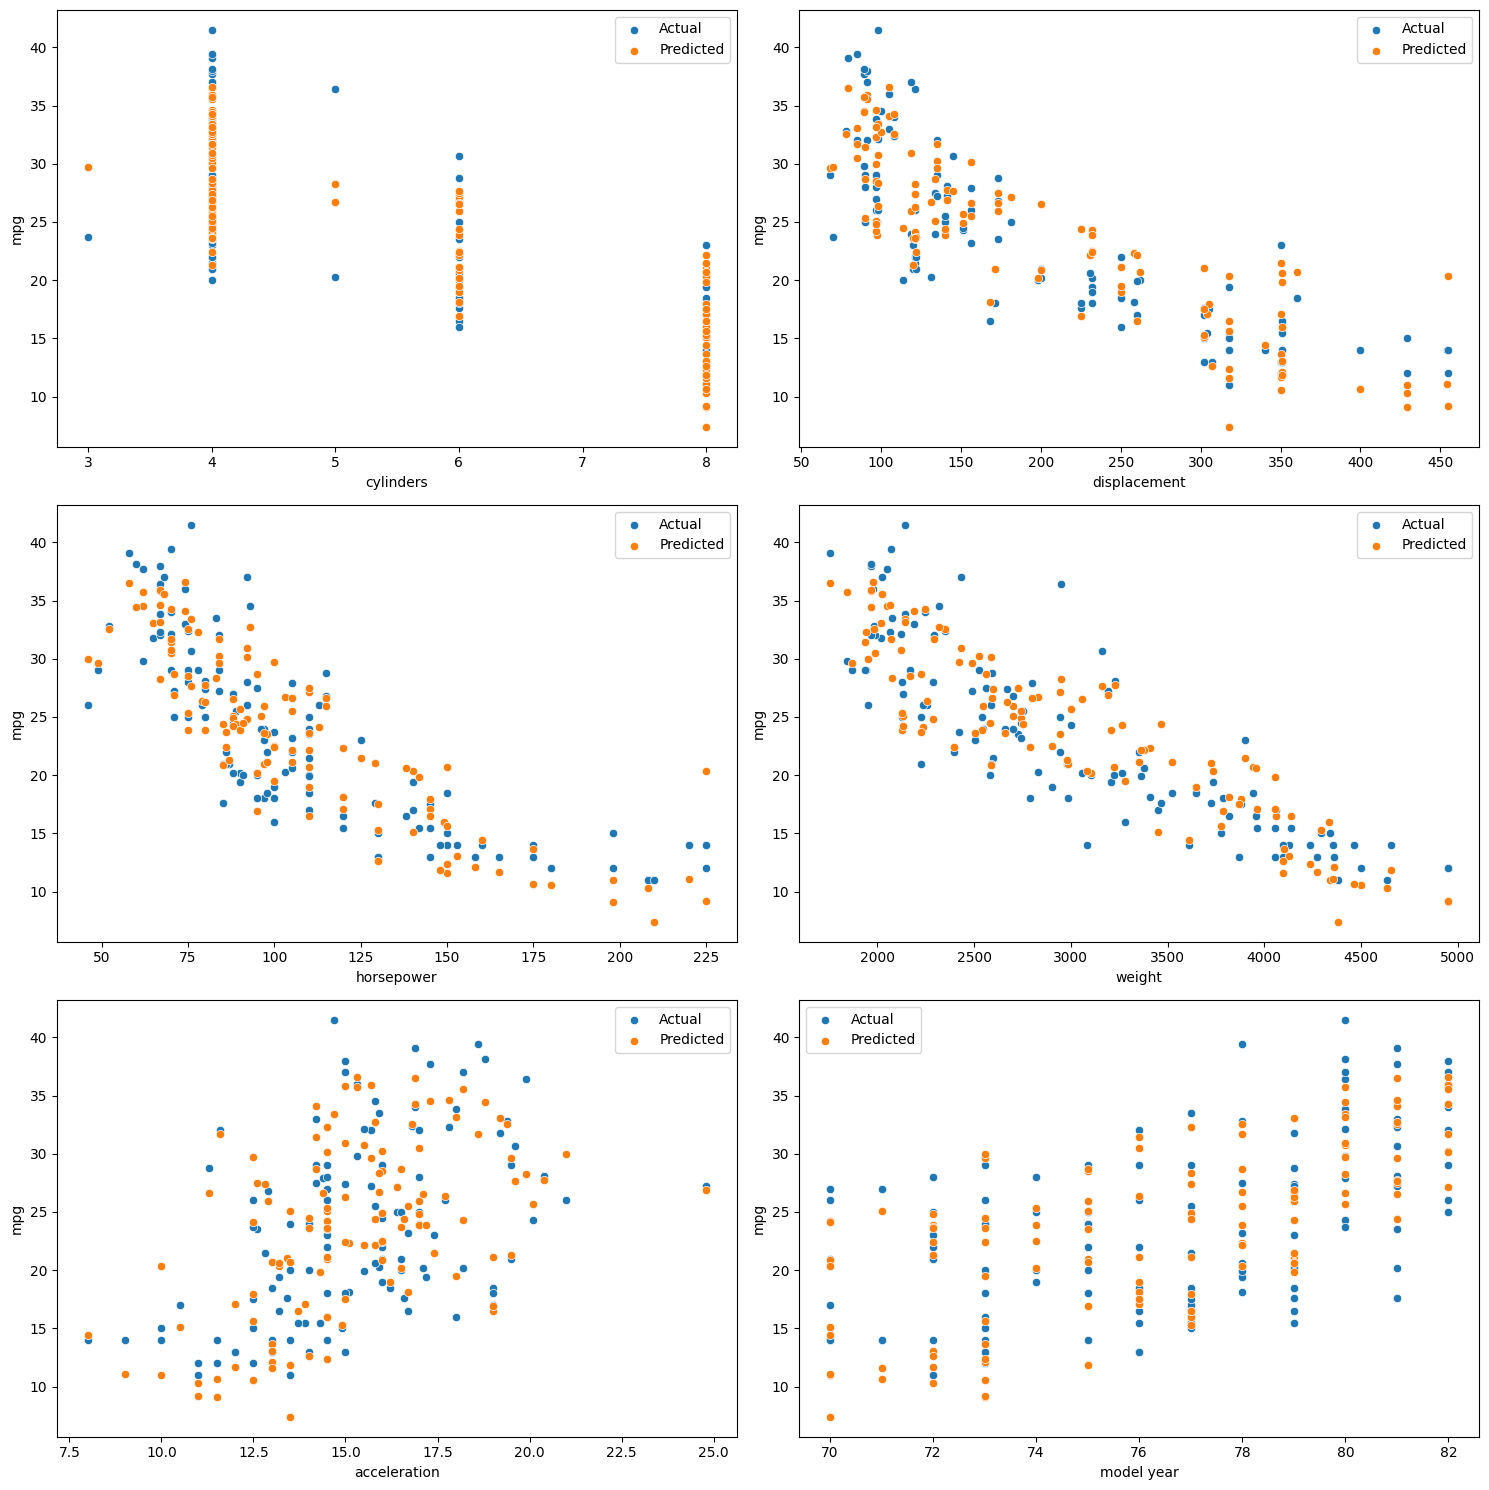

In [120]:
k=0
plt.figure(figsize=(15,15))
for i in x_test.columns:
  k+=1
  if(k>6):
    break
  plt.subplot(3,2,k)
  sns.scatterplot(x=x_test[i],y=y_test,label='Actual')
  sns.scatterplot(x=x_test[i],y=y_hat,label='Predicted')
  plt.legend()

plt.tight_layout()
plt.show()

In [141]:
# By equation of y=mx+c

In [121]:
m=[]
for i,col in enumerate(x_train):
  m.append(model.coef_[i])
m=np.array(m)

In [122]:
y_eqn=[]
for data in x_test.values:
  y_out=sum(data*m)+model.intercept_
  y_eqn.append(y_out)
y_eqn=np.array(y_eqn)

In [123]:
result=[]
for i in range(0,len(y_eqn)):
  if(round(y_eqn[i])==round(y_hat[i])):
    result.append(True)
  else:
    result.append(False)

In [124]:
bool(result)

True

In [139]:
model.score(x_train,y_train)*100

81.41028479576387

In [140]:
model.score(x_test,y_test)*100

84.33220109385644